In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [95]:
df =pd.read_csv('googleplaystore.csv')

In [96]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [97]:
df.shape

(10841, 13)

In [98]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [99]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [100]:
df.dropna(inplace= True)

In [101]:
df.reset_index(drop= True, inplace = True)
df.shape

(9360, 13)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 950.8+ KB


In [103]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [104]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device','nan') if 'Varies with device' in str(x) else x)

In [105]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('M', ''))*1000 if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x : float(x))
df = df[pd.notnull(df['Size'])]
df['Size'].dtype

dtype('float64')

In [106]:
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 5.50e+03, 1.70e+04, 3.90e+04, 3.10e+04,
       4.20e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03, 9.20e+03,
       5.20e+03, 1.10e+04, 2.40e+04, 9.40e+03, 1.50e+04, 1.00e+04,
       1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03, 5.60e+04, 5.70e+04,
       3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03, 5.70e+03, 8.60e+03,
       2.40e+03, 2.70e+04, 2.70e+03, 2.50e+03, 7.00e+03, 1.60e+04,
       3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04, 3.20e+04,
       5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03, 9.80e+03,
       5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03, 7.10e+03,
       2.20e+04, 6.40e+03, 3.20e+03, 8.20e+03, 4.90e+03, 9.50e+03,
       5.00e+03, 5.90e+03, 1.30e+04, 7.30e+04, 6.80e+03, 3.50e+03,
       4.00e+03, 2.30e+03, 2.10e+03, 4.20e+04, 9.10e+03, 5.50e+04,
       2.30e+01, 7.30e+03, 6.50e+03, 1.50e+03, 7.50e+03, 5.10e

In [107]:
 df.shape

(7723, 13)

In [108]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [109]:
df['Reviews'] = df['Reviews'].apply(lambda x : int(x))
df['Reviews'].dtype

dtype('int64')

In [110]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [111]:
df['Installs'] = df['Installs'].apply (lambda x: str(x).replace('+','') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int (x))
df['Installs'].dtype

dtype('int64')

In [112]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

In [113]:
df['Price'] = df['Price'].apply((lambda x:str(x).replace('$','') if '$' in str(x) else str(x)))
df['Price'] = df['Price'].apply (lambda x: float(x))
df['Price'].dtype

dtype('float64')

In [114]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7723.000000,7.723000e+03,7723.000000,7.723000e+03,7723.000000
mean,4.173935,2.948983e+05,22970.456105,8.424070e+06,1.128169
std,0.544638,1.863933e+06,23449.628935,5.015742e+07,17.408036
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.075000e+02,5300.000000,1.000000e+04,0.000000
50%,4.300000,2.332000e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,3.905300e+04,33000.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100000.000000,1.000000e+09,400.000000


In [115]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [116]:
df[df['Rating']>5].shape[0]

0

In [117]:
df[df['Reviews']>df['Installs']].shape[0]

6

In [118]:
df.drop(df[df['Reviews']>df['Installs']].index, inplace = True)

In [119]:
df.shape

(7717, 13)

In [120]:
df[(df['Type']=='free')& (df['Price'] !=0)].shape[0]

0

<AxesSubplot: xlabel='Price'>

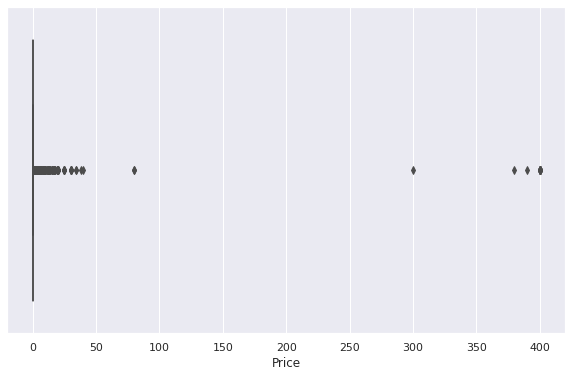

In [121]:
#BOXPLOT for price
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Price',data=df)

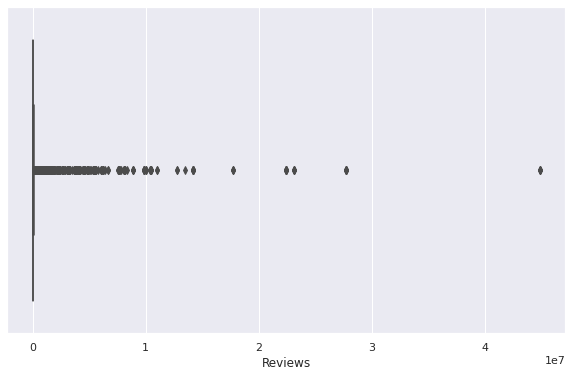

In [122]:
#Boxplot for Reviews
sns.boxplot(x ='Reviews', data =df);

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

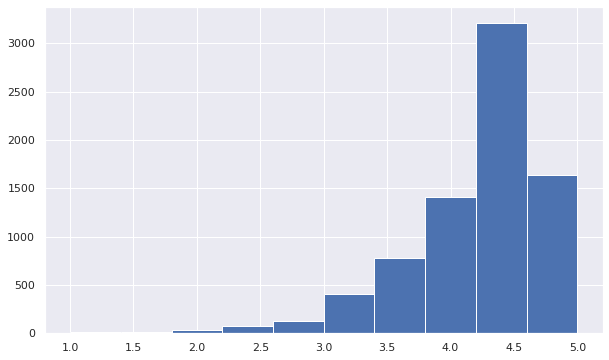

In [123]:
#HISTOGRAM FOR RATING
plt.hist(df['Rating'])

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

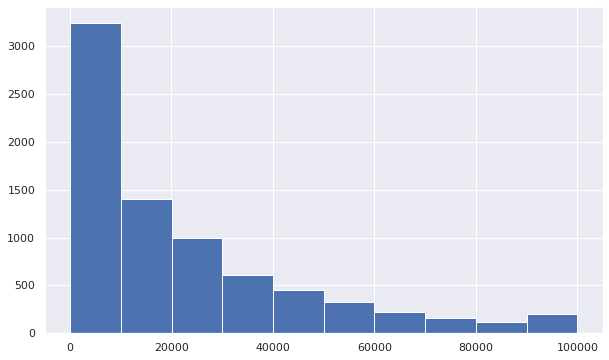

In [124]:
#HISTOGRAM FOR SIZE
plt.hist(df['Size'])

In [125]:
#FINDING APPS WITH PRICE>200
df[df['Price']>200].shape[0]

15

In [126]:
#DROPPING THE JUNK APPS|
df.drop(df[df['Price']>200].index, inplace= True)

In [127]:
df.shape

(7702, 13)

In [128]:
df[df['Reviews']>2000000].shape[0]

219

In [129]:
#Dropping the Star apps as these will skew the analysis
df.drop(df[df['Reviews']>2000000].index, inplace= True)
df.shape

(7483, 13)

In [130]:
#Find out the Percentiles of Installs and decide a threshold as cutoff for outlier
df['Installs'].quantile([.10, .25, .50, .70, .90, .95, .99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [131]:
#dropping the value more than the cutoff(threshold i.e. 95th percentile)
df.drop(df[df['Installs']>10000000].index, inplace= True)

In [132]:
df.shape

(7307, 13)

<AxesSubplot: xlabel='Rating', ylabel='Price'>

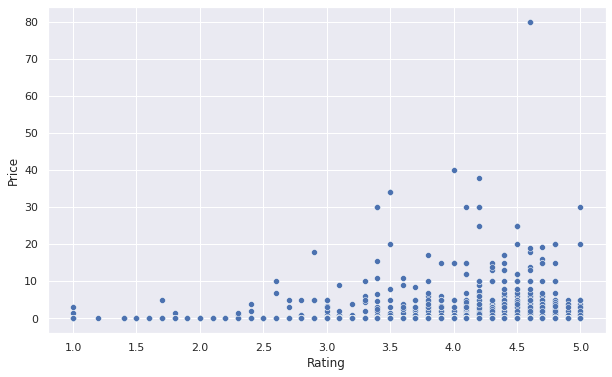

In [133]:
#1.Scatter plot/jointplot for Rating Vs. Price
sns.scatterplot(x='Rating',y='Price',data=df)

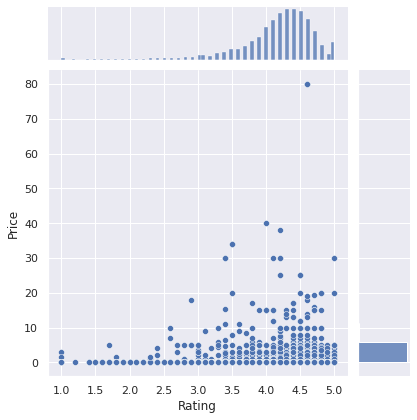

In [134]:
sns.jointplot(x= 'Rating',y= 'Price',data= df)

<AxesSubplot: xlabel='Rating', ylabel='Size'>

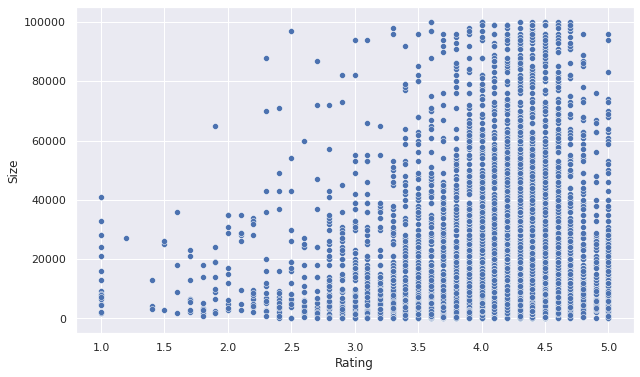

In [135]:
#Scatterplot for Rating Vs. Size
sns.scatterplot(x= 'Rating',y= 'Size', data= df)

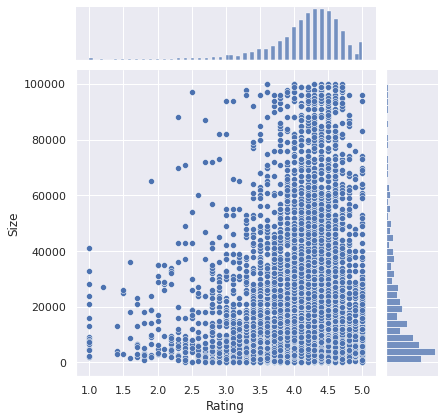

In [136]:
sns.jointplot(x='Rating',y='Size',data=df)

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

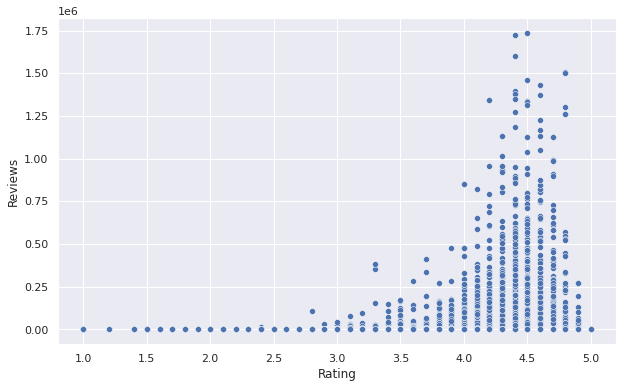

In [137]:
#Scatterplot for Ratings Vs. Reviews
sns.scatterplot(x= 'Rating',y= 'Reviews', data= df)

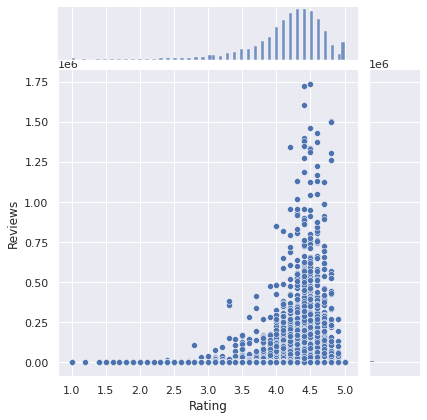

In [138]:
#Jointplot for Rating Vs. Reviews
sns.jointplot(x='Rating',y='Reviews',data=df)

<AxesSubplot: xlabel='Rating', ylabel='Content Rating'>

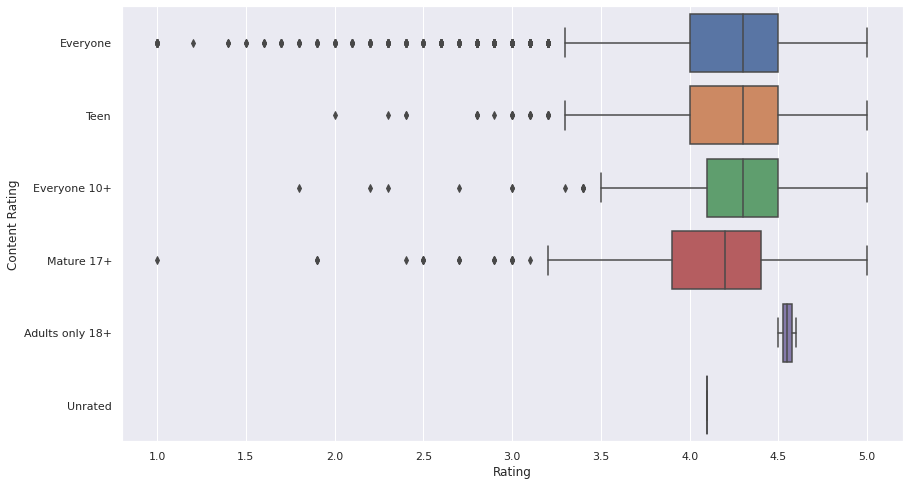

In [139]:
#Boxplot for Ratings Vs. Content Rating
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(x= 'Rating', y= 'Content Rating', data = df)

<AxesSubplot: xlabel='Rating', ylabel='Category'>

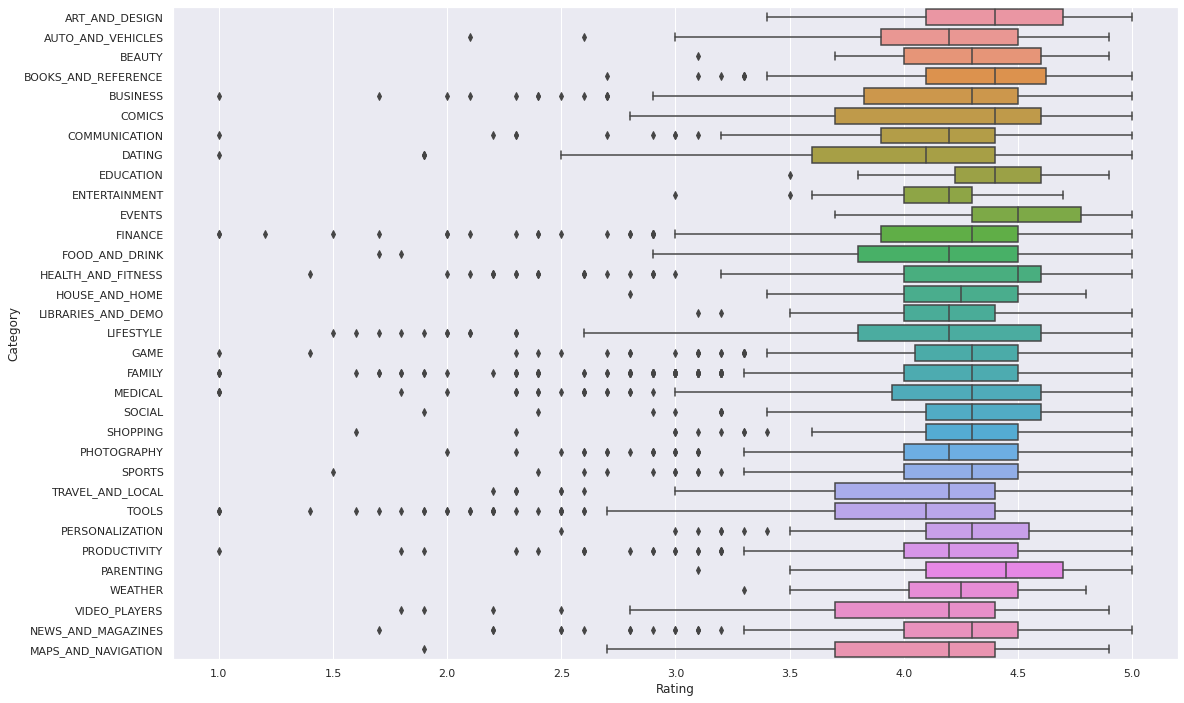

In [140]:
#Boxplot for Ratings Vs. Category
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(x='Rating',y='Category',data=df)

In [141]:
#creating a copy of the data(df) to make all edits
inp1= df.copy()

In [142]:
inp1.shape

(7307, 13)

In [143]:
inp1.skew()

/tmp/ipykernel_75/3545313420.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inp1.skew()


Rating      -1.692510
Reviews      5.305328
Size         1.533259
Installs     1.922597
Price       15.724184
dtype: float64

In [144]:
#applying| log transformation to Reviews
reviews_skew=np.log1p(inp1['Reviews'])
inp1['Reviews']=reviews_skew

In [145]:
inp1['Reviews'].skew()

-0.06808430177422468

In [146]:
#applying log transformation to Installs
installs_skew=np.log1p(inp1['Installs'])
inp1['Installs']=installs_skew

In [147]:
inp1['Installs'].skew()

-0.3930918801065247

In [148]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [149]:
#Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod Ver␣as these won't be useful for our model
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'], axis= 1,inplace = True)

In [150]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


In [151]:
#CREATING A COPY OF THE DATAFRAME.
inp2=inp1

In [152]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


In [153]:
#get unique values in column category
inp2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [154]:
inp2.Category = pd.Categorical(inp2.Category)
x = inp2[['Category']]
del inp2['Category']
dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
#get unique values in Column Genres
inp2['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle', 'Action',
       'Arcade', 'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain 

In [156]:
#Create an empty list
lists = []
#Get the total genres count and gernes count of perticular gerner count less␣than 20 append those into the list
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
#changing the gerners which are in the list to other
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]

In [157]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Trivia',
       'Educational;Education', 'Casual;Pretend Play', 'Medical',
       'Social', 'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Adventure', 'Educational', 'Casino'], dtype=object)

In [158]:
inp2.Genres=pd.Categorical(inp2['Genres'])
x=inp2[['Genres']]
del inp2['Genres']
dummies=pd.get_dummies(x,prefix='Genres')
inp2=pd.concat([inp2,dummies],axis=1)

In [159]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
#getting the unique values in Column "Content Rating"
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [162]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])
x = inp2[['Content Rating']]
del inp2['Content Rating']
dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [163]:
inp2.shape

(7307, 95)

In [164]:
#importing the neccessary libraries from sklearn to split the data and and for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [166]:
#Creating the variable X and Y which contains the X features as independent features and Y is the target feature
df2 = inp2
X = df2.drop('Rating',axis=1)
y = df2['Rating']

In [167]:
#Dividing the X and y into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=5)

In [168]:
y_test

6582    4.4
43      4.7
7677    4.1
5631    4.1
85      3.2
       ... 
6845    3.7
593     4.8
3784    3.4
1951    4.5
6148    4.3
Name: Rating, Length: 2193, dtype: float64

In [169]:
#Create a linear reggression obj by calling the linear reggressor algorithm
lin_reggressor = LinearRegression()
lin_reggressor.fit(X_train,y_train)

LinearRegression()

In [170]:
R2_Score_train_data = round(lin_reggressor.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_Score_train_data))

The R2 value of the Training Set is : 0.148


In [171]:
# test the output by changing values, like 3750
y_pred = lin_reggressor.predict(X_test)
R2_Score_test_data =metrics.r2_score(y_test,y_pred)
R2_Score_test_data

0.1372540600429737

In [172]:
R2_Score_test_data = round(lin_reggressor.score(X_test,y_test),3)
print("The R2 value of the Training Set is : {}".format(R2_Score_test_data))

The R2 value of the Training Set is : 0.137
